In [359]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

# SCRAPES THE LATEST DATA FROM WORLDOMETERS
url = 'https://www.worldometers.info/coronavirus/#countries'

r = requests.get(url)

c = r.content

soup = bs(c,'html.parser')

main_table = soup.findAll('table',{'id':'main_table_countries'})

table = main_table[0]

body = table.find('tbody')
rows = body.findAll('tr')

countries = dict()

for r in rows:
    td = r.findAll('td')
    name = td[0].get_text().strip()
    confirmed = td[1].get_text().strip()
    inc = td[2].get_text().strip()
    deaths = td[3].get_text().strip()
    d_inc = td[4].get_text().strip()
    recovered = td[5].get_text().strip()
    active_cases = td[6].get_text().strip()
    serious = td[7].get_text().strip()
    conf_p_M = td[8].get_text().strip()
    countries[name] = [confirmed,inc,deaths,d_inc,
                       recovered,active_cases,serious,conf_p_M]

cols = ['confirmed','inc','dead','dead_inc','recovered',
        'active_cases','serious','confirmed_per_M']

df = pd.DataFrame.from_dict(countries)
df = df.T
df.columns = cols



df[['inc','dead_inc']] = df[['inc','dead_inc']].apply(
    lambda x : x.str.replace('+',''))

df[['confirmed','dead','recovered','active_cases',
    'serious','inc','dead_inc']] = \
    df[['confirmed','dead','recovered','active_cases',
        'serious','inc','dead_inc']].apply(
    lambda x : x.str.replace(',',''))

df[cols] = df[cols].apply(lambda x: x.replace('',np.nan))


df[cols] = df[cols].astype(float)
df['yesterday'] = df['confirmed'] - df['inc']
df['factor'] = df['confirmed'] / df['yesterday']
cols  = ['confirmed', 'yesterday','inc', 'factor','dead', 'dead_inc', 'recovered', 'active_cases',
       'serious', 'confirmed_per_M']

df = df[cols]

#df['factor'].loc[df['factor'] == np.inf]
df['factor'] = df['factor'].replace(np.inf,np.nan)
df['dead_pct'] = 100 * df['dead'] / df['confirmed']

df.head(40)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct
China,80879.0,80844.0,35.0,1.000433,3213.0,14.0,67766.0,9900.0,3226.0,56.2,3.972601
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977
Iran,13938.0,NaN,NaN,NaN,724.0,NaN,4590.0,8624.0,NaN,165.9,5.194432
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636
Spain,7988.0,NaN,NaN,NaN,294.0,NaN,517.0,7177.0,272.0,170.8,3.680521
Germany,5813.0,NaN,NaN,NaN,13.0,NaN,46.0,5754.0,2.0,69.4,0.223637
France,5423.0,NaN,NaN,NaN,127.0,NaN,12.0,5284.0,400.0,83.1,2.341877
USA,3802.0,3680.0,122.0,1.033152,69.0,1.0,73.0,3660.0,10.0,11.5,1.814834
Switzerland,2217.0,NaN,NaN,NaN,14.0,NaN,4.0,2199.0,NaN,256.2,0.631484
UK,1391.0,NaN,NaN,NaN,35.0,NaN,20.0,1336.0,20.0,20.5,2.516175


In [360]:
today = pd.to_datetime('today').strftime('%Y-%m-%d %H:%M:%S')
file_prefix = 'snapshots/corona_snapshot_'
filename = file_prefix + today.replace(' ','_').replace(':','_') + '.pkl'
df['datetime'] = [today] * len(df)
df.set_index([df.index,'datetime'],drop=True).to_pickle(filename)
df.head()

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80879.0,80844.0,35.0,1.000433,3213.0,14.0,67766.0,9900.0,3226.0,56.2,3.972601,2020-03-16 10:59:30
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 10:59:30
Iran,13938.0,NaN,NaN,NaN,724.0,NaN,4590.0,8624.0,NaN,165.9,5.194432,2020-03-16 10:59:30
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 10:59:30
Spain,7988.0,NaN,NaN,NaN,294.0,NaN,517.0,7177.0,272.0,170.8,3.680521,2020-03-16 10:59:30


In [361]:
import glob
files = [f for f in glob.glob('./' + file_prefix +'*')]

timeline_df = pd.DataFrame()

for f in files:
    temp = pd.read_pickle(f)
    timeline_df = pd.concat([timeline_df,temp],axis=0)
    
timeline_df.sort_index(inplace=True)
timeline_df

confirmed  yesterday  inc    factor  dead  \
            datetime                                                         
Afghanistan 2020-03-15 15:50:08       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 16:55:44       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 19:43:02       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 21:46:07       16.0       11.0  5.0  1.454545   NaN   
            2020-03-15 22:21:09       16.0       11.0  5.0  1.454545   NaN   
...                                    ...        ...  ...       ...   ...   
Vietnam     2020-03-15 23:38:04       56.0       53.0  3.0  1.056604   NaN   
            2020-03-16 08:41:58       57.0        NaN  NaN       NaN   NaN   
            2020-03-16 10:29:44       57.0        NaN  NaN       NaN   NaN   
            2020-03-16 10:42:31       57.0        NaN  NaN       NaN   NaN   
            2020-03-16 10:59:30       57.0        NaN  NaN       NaN   NaN   

                                 dead_inc  recovered  active_cases  serious  \
            datetime                                                          
Afghanistan 2020-03-15 15:50:08       NaN        1.0          15.0      NaN   
            2020-03-15 16:55:44       NaN        1.0          15.0      NaN   
            2020-03-15 19:43:02       NaN        1.0          15.0      NaN   
            2020-03-15 21:46:07       NaN        1.0          15.0      NaN   
            2020-03-15 22:21:09       NaN        1.0          15.0      NaN   
...                                   ...        ...           ...      ...   
Vietnam     2020-03-15 23:38:04       NaN       16.0          40.0      NaN   
            2020-03-16 08:41:58       NaN       16.0          41.0      NaN   
            2020-03-16 10:29:44       NaN       16.0          41.0      NaN   
            2020-03-16 10:42:31       NaN       16.0          41.0      NaN   
            2020-03-16 10:59:30       NaN       16.0          41.0      NaN   

                                 confirmed_per_M  dead_pct  
            datetime                                        
Afghanistan 2020-03-15 15:50:08              0.4       NaN  
            2020-03-15 16:55:44              0.4       NaN  
            2020-03-15 19:43:02              0.4       NaN  
            2020-03-15 21:46:07              0.4       NaN  
            2020-03-15 22:21:09              0.4       NaN  
...                                          ...       ...  
Vietnam     2020-03-15 23:38:04              0.6       NaN  
            2020-03-16 08:41:58              0.6       NaN  
            2020-03-16 10:29:44              0.6       NaN  
            2020-03-16 10:42:31              0.6       NaN  
            2020-03-16 10:59:30              0.6       NaN  

[2055 rows x 11 columns]

In [362]:
timeline_group = timeline_df.groupby(level=0)

a_country = timeline_group.get_group('USA')
a_country

confirmed  yesterday    inc    factor  dead  \
    datetime                                                           
USA 2020-03-15 15:50:08     3083.0     2943.0  140.0  1.047571  60.0   
    2020-03-15 16:55:44     3094.0     2943.0  151.0  1.051308  62.0   
    2020-03-15 19:43:02     3326.0     2943.0  383.0  1.130139  63.0   
    2020-03-15 21:46:07     3457.0     2943.0  514.0  1.174652  63.0   
    2020-03-15 22:21:09     3621.0     2943.0  678.0  1.230377  63.0   
    2020-03-15 22:23:46     3621.0     2943.0  678.0  1.230377  63.0   
    2020-03-15 22:34:01     3621.0     2943.0  678.0  1.230377  63.0   
    2020-03-15 23:37:02     3557.0     2943.0  614.0  1.208631  68.0   
    2020-03-15 23:38:04     3557.0     2943.0  614.0  1.208631  68.0   
    2020-03-16 08:41:58     3782.0     3680.0  102.0  1.027717  69.0   
    2020-03-16 10:29:44     3802.0     3680.0  122.0  1.033152  69.0   
    2020-03-16 10:42:31     3802.0     3680.0  122.0  1.033152  69.0   
    2020-03-16 10:59:30     3802.0     3680.0  122.0  1.033152  69.0   

                         dead_inc  recovered  active_cases  serious  \
    datetime                                                          
USA 2020-03-15 15:50:08       3.0       56.0        2967.0     10.0   
    2020-03-15 16:55:44       5.0       56.0        2976.0     10.0   
    2020-03-15 19:43:02       6.0       59.0        3204.0     10.0   
    2020-03-15 21:46:07       6.0       59.0        3335.0     10.0   
    2020-03-15 22:21:09       6.0       59.0        3499.0     10.0   
    2020-03-15 22:23:46       6.0       59.0        3499.0     10.0   
    2020-03-15 22:34:01       6.0       59.0        3499.0     10.0   
    2020-03-15 23:37:02      11.0       59.0        3430.0     10.0   
    2020-03-15 23:38:04      11.0       59.0        3430.0     10.0   
    2020-03-16 08:41:58       1.0       73.0        3640.0     10.0   
    2020-03-16 10:29:44       1.0       73.0        3660.0     10.0   
    2020-03-16 10:42:31       1.0       73.0        3660.0     10.0   
    2020-03-16 10:59:30       1.0       73.0        3660.0     10.0   

                         confirmed_per_M  dead_pct  
    datetime                                        
USA 2020-03-15 15:50:08              9.3  1.946156  
    2020-03-15 16:55:44              9.3  2.003878  
    2020-03-15 19:43:02             10.0  1.894167  
    2020-03-15 21:46:07             10.4  1.822389  
    2020-03-15 22:21:09             10.9  1.739851  
    2020-03-15 22:23:46             10.9  1.739851  
    2020-03-15 22:34:01             10.9  1.739851  
    2020-03-15 23:37:02             10.7  1.911723  
    2020-03-15 23:38:04             10.7  1.911723  
    2020-03-16 08:41:58             11.4  1.824432  
    2020-03-16 10:29:44             11.5  1.814834  
    2020-03-16 10:42:31             11.5  1.814834  
    2020-03-16 10:59:30             11.5  1.814834

In [363]:
non_duplicates = ( ( a_country['confirmed'] != a_country['confirmed'].shift() )  | (
    a_country['dead'] != a_country['dead'].shift()))

a_country = a_country[non_duplicates]
a_country

confirmed  yesterday    inc    factor  dead  \
    datetime                                                           
USA 2020-03-15 15:50:08     3083.0     2943.0  140.0  1.047571  60.0   
    2020-03-15 16:55:44     3094.0     2943.0  151.0  1.051308  62.0   
    2020-03-15 19:43:02     3326.0     2943.0  383.0  1.130139  63.0   
    2020-03-15 21:46:07     3457.0     2943.0  514.0  1.174652  63.0   
    2020-03-15 22:21:09     3621.0     2943.0  678.0  1.230377  63.0   
    2020-03-15 23:37:02     3557.0     2943.0  614.0  1.208631  68.0   
    2020-03-16 08:41:58     3782.0     3680.0  102.0  1.027717  69.0   
    2020-03-16 10:29:44     3802.0     3680.0  122.0  1.033152  69.0   

                         dead_inc  recovered  active_cases  serious  \
    datetime                                                          
USA 2020-03-15 15:50:08       3.0       56.0        2967.0     10.0   
    2020-03-15 16:55:44       5.0       56.0        2976.0     10.0   
    2020-03-15 19:43:02       6.0       59.0        3204.0     10.0   
    2020-03-15 21:46:07       6.0       59.0        3335.0     10.0   
    2020-03-15 22:21:09       6.0       59.0        3499.0     10.0   
    2020-03-15 23:37:02      11.0       59.0        3430.0     10.0   
    2020-03-16 08:41:58       1.0       73.0        3640.0     10.0   
    2020-03-16 10:29:44       1.0       73.0        3660.0     10.0   

                         confirmed_per_M  dead_pct  
    datetime                                        
USA 2020-03-15 15:50:08              9.3  1.946156  
    2020-03-15 16:55:44              9.3  2.003878  
    2020-03-15 19:43:02             10.0  1.894167  
    2020-03-15 21:46:07             10.4  1.822389  
    2020-03-15 22:21:09             10.9  1.739851  
    2020-03-15 23:37:02             10.7  1.911723  
    2020-03-16 08:41:58             11.4  1.824432  
    2020-03-16 10:29:44             11.5  1.814834

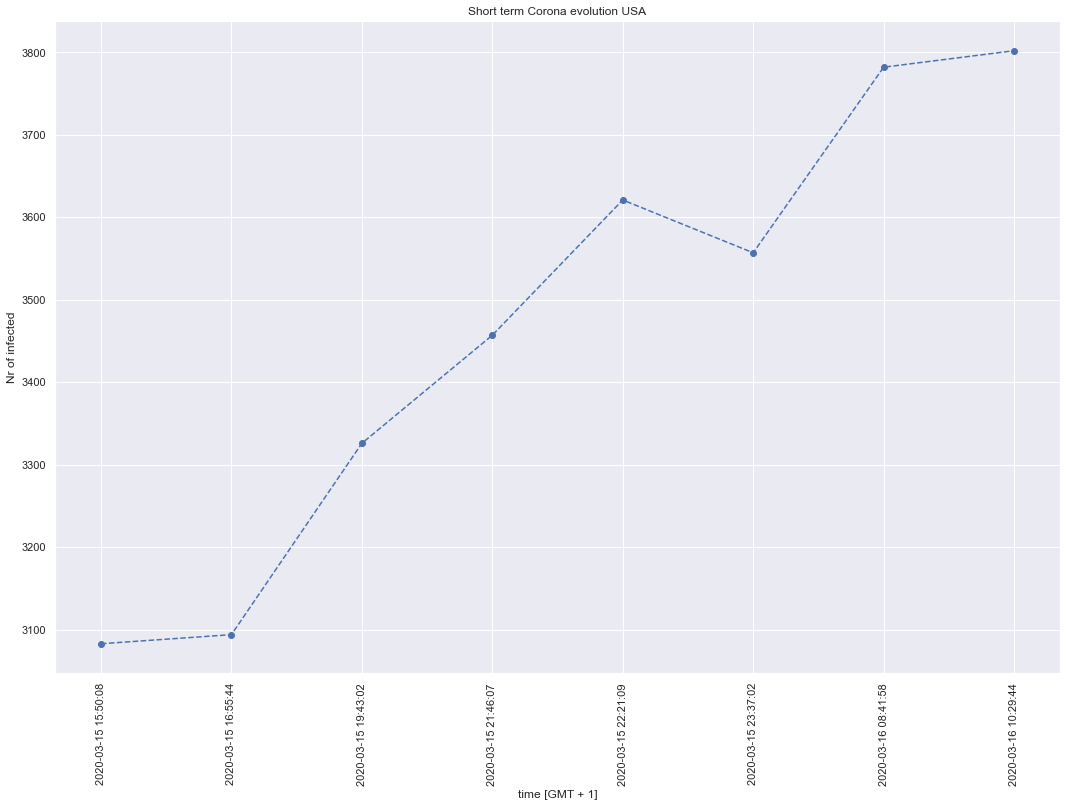

In [364]:


plt.figure(figsize=(18,12))
plt.title('Short term Corona evolution {}'.format(a_country.index[0][0]))
a_country['confirmed'].plot(style ='o--')
plt.xticks(rotation=90)
plt.xticks(range(len(a_country.index)),[a_country.index[i][1] for i in range(len(a_country.index))])
plt.xlabel('time [GMT + 1]')

plt.ylabel('Nr of infected')
#plt.ylabel(r'Nr of infected [ $10^{x}$ ]')
#plt.yscale('log')

filename = 'corona_short_term_' + a_country.index[0][0] + '.jpg'
plt.savefig (filename,format='jpg')


In [365]:
top_dead_pct = df.loc[df['confirmed'] > 500].sort_values('dead_pct',ascending=False)
top_dead_pct

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 10:59:30
Iran,13938.0,NaN,NaN,NaN,724.0,NaN,4590.0,8624.0,NaN,165.9,5.194432,2020-03-16 10:59:30
China,80879.0,80844.0,35.0,1.000433,3213.0,14.0,67766.0,9900.0,3226.0,56.2,3.972601,2020-03-16 10:59:30
Spain,7988.0,NaN,NaN,NaN,294.0,NaN,517.0,7177.0,272.0,170.8,3.680521,2020-03-16 10:59:30
Japan,840.0,839.0,1.0,1.001192,25.0,1.0,144.0,671.0,36.0,6.6,2.976190,2020-03-16 10:59:30
UK,1391.0,NaN,NaN,NaN,35.0,NaN,20.0,1336.0,20.0,20.5,2.516175,2020-03-16 10:59:30
France,5423.0,NaN,NaN,NaN,127.0,NaN,12.0,5284.0,400.0,83.1,2.341877,2020-03-16 10:59:30
USA,3802.0,3680.0,122.0,1.033152,69.0,1.0,73.0,3660.0,10.0,11.5,1.814834,2020-03-16 10:59:30
Netherlands,1135.0,NaN,NaN,NaN,20.0,NaN,2.0,1113.0,45.0,66.2,1.762115,2020-03-16 10:59:30
Diamond Princess,696.0,NaN,NaN,NaN,7.0,NaN,456.0,233.0,15.0,NaN,1.005747,2020-03-16 10:59:30


In [366]:
country_names = sorted(df.index.values)
#country_names

In [367]:
df.loc[df['confirmed'] > 100].sort_values('factor',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Malaysia,553.0,428.0,125.0,1.292056,NaN,NaN,42.0,511.0,9.0,17.1,NaN,2020-03-16 10:59:30
Australia,375.0,300.0,75.0,1.250000,6.0,1.0,27.0,342.0,1.0,14.7,1.600000,2020-03-16 10:59:30
Poland,150.0,125.0,25.0,1.200000,3.0,NaN,13.0,134.0,3.0,4.0,2.000000,2020-03-16 10:59:30
Estonia,205.0,171.0,34.0,1.198830,NaN,NaN,1.0,204.0,NaN,154.5,NaN,2020-03-16 10:59:30
Israel,250.0,213.0,37.0,1.173709,NaN,NaN,4.0,246.0,4.0,28.9,NaN,2020-03-16 10:59:30
Romania,158.0,139.0,19.0,1.136691,NaN,NaN,9.0,149.0,1.0,8.2,NaN,2020-03-16 10:59:30
Austria,959.0,860.0,99.0,1.115116,2.0,1.0,6.0,951.0,1.0,106.5,0.208551,2020-03-16 10:59:30
Kuwait,123.0,112.0,11.0,1.098214,NaN,NaN,9.0,114.0,4.0,28.8,NaN,2020-03-16 10:59:30
Finland,264.0,244.0,20.0,1.081967,NaN,NaN,10.0,254.0,1.0,47.6,NaN,2020-03-16 10:59:30
Denmark,898.0,864.0,34.0,1.039352,4.0,2.0,1.0,893.0,2.0,155.0,0.445434,2020-03-16 10:59:30


In [368]:
top_10_per_m = df.sort_values('confirmed_per_M',ascending=False).head(10)
top_10_per_m

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 10:59:30
Switzerland,2217.0,NaN,NaN,NaN,14.0,NaN,4.0,2199.0,NaN,256.2,0.631484,2020-03-16 10:59:30
Norway,1262.0,1256.0,6.0,1.004777,3.0,NaN,1.0,1258.0,27.0,232.8,0.237718,2020-03-16 10:59:30
Spain,7988.0,NaN,NaN,NaN,294.0,NaN,517.0,7177.0,272.0,170.8,3.680521,2020-03-16 10:59:30
Iran,13938.0,NaN,NaN,NaN,724.0,NaN,4590.0,8624.0,NaN,165.9,5.194432,2020-03-16 10:59:30
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 10:59:30
Denmark,898.0,864.0,34.0,1.039352,4.0,2.0,1.0,893.0,2.0,155.0,0.445434,2020-03-16 10:59:30
Estonia,205.0,171.0,34.0,1.198830,NaN,NaN,1.0,204.0,NaN,154.5,NaN,2020-03-16 10:59:30
Qatar,401.0,NaN,NaN,NaN,NaN,NaN,4.0,397.0,NaN,139.2,NaN,2020-03-16 10:59:30
Bahrain,221.0,214.0,7.0,1.032710,1.0,1.0,77.0,143.0,1.0,129.9,0.452489,2020-03-16 10:59:30


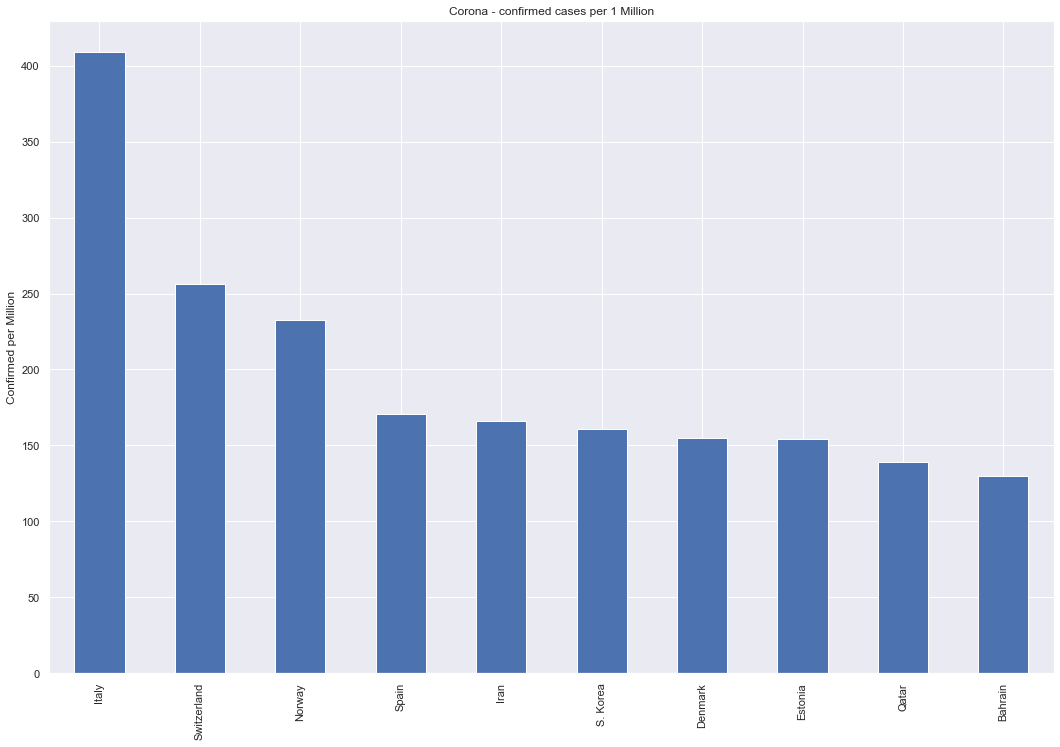

In [369]:
plt.figure(figsize=(18,12))
plt.title('Corona - confirmed cases per 1 Million')
plt.ylabel ('Confirmed per Million')
top_10_per_m['confirmed_per_M'].plot(kind='bar')
plt.savefig('confirmed_per_million.jpg',format='jpg')

In [370]:
totals = pd.DataFrame(df.sum(),columns=['totals'])
totals.drop(['factor','confirmed_per_M','dead_pct','datetime'],inplace=True)
totals

,totals
confirmed,170443
yesterday,99656
inc,893
dead,6526
dead_inc,21
recovered,77790
active_cases,86127
serious,5927


In [371]:
country_names = list(sorted((df.index.unique().values)))
#country_names

In [372]:
some_countries = ['Sweden','USA','Italy','Spain','Norway','Finland',
                  'Denmark','Singapore','S. Korea','China','Russia',
                 'Poland','Taiwan','Estonia']
countries_of_interest = df.loc[some_countries,:]
countries_of_interest.sort_values('confirmed',inplace=True,ascending=False)
countries_of_interest

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80879.0,80844.0,35.0,1.000433,3213.0,14.0,67766.0,9900.0,3226.0,56.2,3.972601,2020-03-16 10:59:30
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 10:59:30
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 10:59:30
Spain,7988.0,NaN,NaN,NaN,294.0,NaN,517.0,7177.0,272.0,170.8,3.680521,2020-03-16 10:59:30
USA,3802.0,3680.0,122.0,1.033152,69.0,1.0,73.0,3660.0,10.0,11.5,1.814834,2020-03-16 10:59:30
Norway,1262.0,1256.0,6.0,1.004777,3.0,NaN,1.0,1258.0,27.0,232.8,0.237718,2020-03-16 10:59:30
Sweden,1040.0,NaN,NaN,NaN,3.0,NaN,1.0,1036.0,2.0,103.0,0.288462,2020-03-16 10:59:30
Denmark,898.0,864.0,34.0,1.039352,4.0,2.0,1.0,893.0,2.0,155.0,0.445434,2020-03-16 10:59:30
Finland,264.0,244.0,20.0,1.081967,NaN,NaN,10.0,254.0,1.0,47.6,NaN,2020-03-16 10:59:30
Singapore,226.0,NaN,NaN,NaN,NaN,NaN,105.0,121.0,11.0,38.6,NaN,2020-03-16 10:59:30


In [373]:
countries_of_interest.sort_values('confirmed_per_M',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 10:59:30
Norway,1262.0,1256.0,6.0,1.004777,3.0,NaN,1.0,1258.0,27.0,232.8,0.237718,2020-03-16 10:59:30
Spain,7988.0,NaN,NaN,NaN,294.0,NaN,517.0,7177.0,272.0,170.8,3.680521,2020-03-16 10:59:30
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 10:59:30
Denmark,898.0,864.0,34.0,1.039352,4.0,2.0,1.0,893.0,2.0,155.0,0.445434,2020-03-16 10:59:30
Estonia,205.0,171.0,34.0,1.198830,NaN,NaN,1.0,204.0,NaN,154.5,NaN,2020-03-16 10:59:30
Sweden,1040.0,NaN,NaN,NaN,3.0,NaN,1.0,1036.0,2.0,103.0,0.288462,2020-03-16 10:59:30
China,80879.0,80844.0,35.0,1.000433,3213.0,14.0,67766.0,9900.0,3226.0,56.2,3.972601,2020-03-16 10:59:30
Finland,264.0,244.0,20.0,1.081967,NaN,NaN,10.0,254.0,1.0,47.6,NaN,2020-03-16 10:59:30
Singapore,226.0,NaN,NaN,NaN,NaN,NaN,105.0,121.0,11.0,38.6,NaN,2020-03-16 10:59:30
